## Turbine components sizing

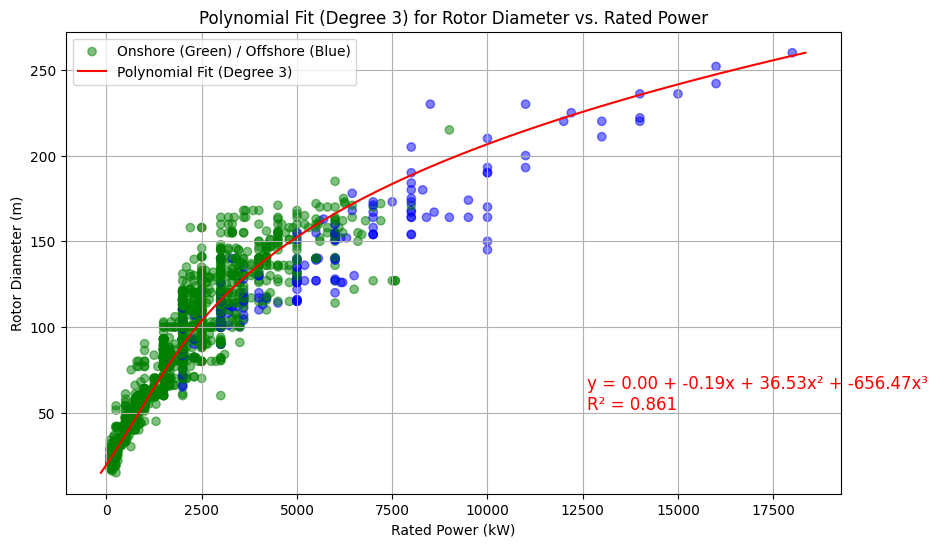

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

# Load the spreadsheet
file_path = "Turbines_20230629.xlsx"  # Adjust path if necessary
df = pd.read_excel(file_path, sheet_name="Turbines")

# Clean and extract necessary columns
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
df["rated_power"] = pd.to_numeric(df["rated_power"], errors="coerce")
df["rotor_diameter"] = pd.to_numeric(df["rotor_diameter"], errors="coerce")
df = df.dropna(subset=["rated_power", "rotor_diameter"])

df["offshore"] = df["offshore"].astype(str).str.lower() == "yes"

# Extract x (Rotor Diameter) and y (Rated Power)
x = df["rotor_diameter"].values
y = df["rated_power"].values

# Define colors for offshore and onshore points
colors = np.where(df["offshore"], "blue", "green")

# Fit polynomial of degree 3
degree = 3
poly_coeffs = np.polyfit(x, y, degree)
poly_model = np.poly1d(poly_coeffs)

# Generate predictions for plotting
x_fit = np.linspace(min(x), max(x), 100)
y_poly_fit = poly_model(x_fit)

# Compute R-squared value
r2 = r2_score(y, poly_model(x))

# Get polynomial equation as a string
coeffs = poly_model.coefficients
equation = f"{coeffs[0]:.2f} + {coeffs[1]:.2f}x + {coeffs[2]:.2f}x² + {coeffs[3]:.2f}x³"

# Plot the scatter with offshore/onshore colors
plt.figure(figsize=(10, 6))
plt.scatter(y, x, c=colors, label="Onshore (Green) / Offshore (Blue)", alpha=0.5)
plt.plot(y_poly_fit, x_fit, label=f"Polynomial Fit (Degree {degree})", color="red")

# Add equation and R² value to the plot
text_x = max(y) * 0.7
text_y = max(x) * 0.2
plt.text(text_x, text_y, f"y = {equation}\nR² = {r2:.3f}", fontsize=12, color="red")

plt.xlabel("Rated Power (kW)")
plt.ylabel("Rotor Diameter (m)")
plt.legend()
plt.title(f"Polynomial Fit (Degree {degree}) for Rotor Diameter vs. Rated Power")
plt.grid()
plt.show()


/var/folders/_s/t2tb7ghj5k77zblhgrk26qk80000gn/T/ipykernel_9637/1203030281.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rotor["offshore"] = df_rotor["offshore"].astype(str).str.lower() == "yes"


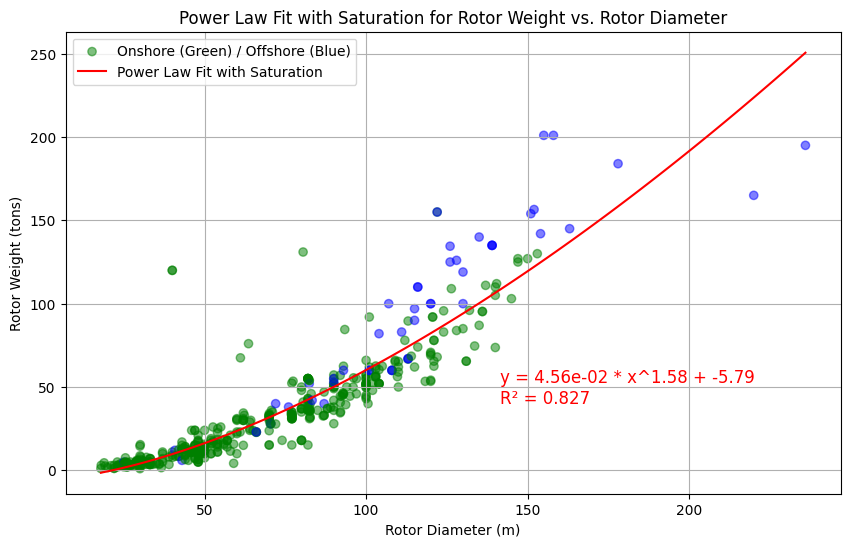

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

# Load the spreadsheet
file_path = "Turbines_20230629.xlsx"  # Adjust path if necessary
df = pd.read_excel(file_path, sheet_name="Turbines")

# Clean and extract necessary columns
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
df["rotor_diameter"] = pd.to_numeric(df["rotor_diameter"], errors="coerce")
df["rotor_weight"] = pd.to_numeric(df["rotor_weight"], errors="coerce")

# Drop rows with missing values
df_rotor = df.dropna(subset=["rotor_diameter", "rotor_weight"])

# Extract x (Rotor Diameter) and y (Rotor Weight)
x_rotor = df_rotor["rotor_diameter"].values
y_rotor = df_rotor["rotor_weight"].values

# Define a power-law function with saturation to enforce a non-decreasing trend
def power_law_with_saturation(x, a, b, c):
    return a * (x ** b) + c

# Fit the power-law model
popt_power_law_rotor, _ = curve_fit(power_law_with_saturation, x_rotor, y_rotor, maxfev=10000)

# Generate predictions for plotting
x_fit_rotor = np.linspace(min(x_rotor), max(x_rotor), 100)
y_power_law_fit_rotor = power_law_with_saturation(x_fit_rotor, *popt_power_law_rotor)

# Compute R² value
r2_power_law_rotor = r2_score(y_rotor, power_law_with_saturation(x_rotor, *popt_power_law_rotor))

# Get equation as a string
equation_power_law_rotor = f"{popt_power_law_rotor[0]:.2e} * x^{popt_power_law_rotor[1]:.2f} + {popt_power_law_rotor[2]:.2f}"

# Define colors for offshore and onshore points
df_rotor["offshore"] = df_rotor["offshore"].astype(str).str.lower() == "yes"
colors_rotor = np.where(df_rotor["offshore"], "blue", "green")

# Plot scatter with power-law fit
plt.figure(figsize=(10, 6))
plt.scatter(x_rotor, y_rotor, c=colors_rotor, label="Onshore (Green) / Offshore (Blue)", alpha=0.5)
plt.plot(x_fit_rotor, y_power_law_fit_rotor, label="Power Law Fit with Saturation", color="red")

# Add equation and R² value
text_x_rotor = max(x_rotor) * 0.6
text_y_rotor = max(y_rotor) * 0.2
plt.text(text_x_rotor, text_y_rotor, f"y = {equation_power_law_rotor}\nR² = {r2_power_law_rotor:.3f}", fontsize=12, color="red")

plt.xlabel("Rotor Diameter (m)")
plt.ylabel("Rotor Weight (tons)")
plt.legend()
plt.title("Power Law Fit with Saturation for Rotor Weight vs. Rotor Diameter")
plt.grid()
plt.show()


/var/folders/_s/t2tb7ghj5k77zblhgrk26qk80000gn/T/ipykernel_9637/2178851486.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hub["offshore"] = df_hub["offshore"].astype(str).str.lower() == "yes"


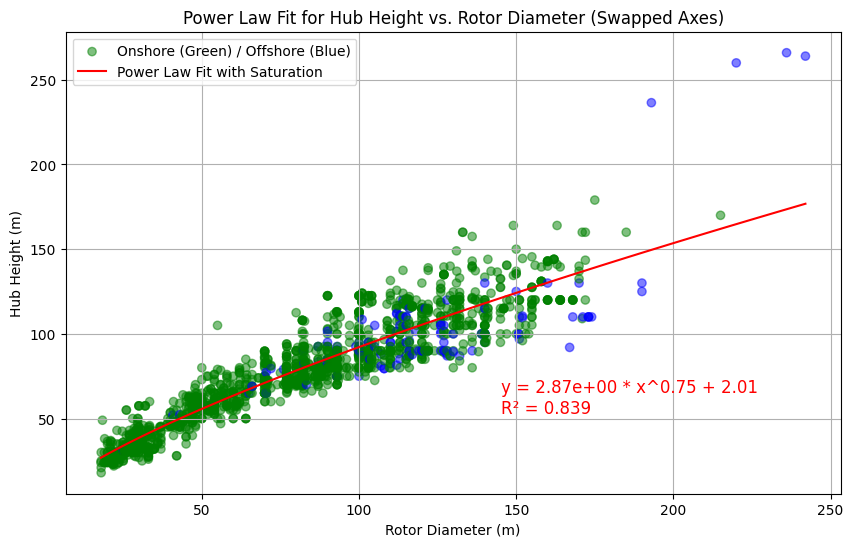

In [12]:
# Re-import necessary libraries after execution state reset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

# Reload the spreadsheet
file_path = "Turbines_20230629.xlsx"
df = pd.read_excel(file_path, sheet_name="Turbines")

# Clean and extract necessary columns
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
df["rotor_diameter"] = pd.to_numeric(df["rotor_diameter"], errors="coerce")
df["minimum_hub_height"] = pd.to_numeric(df["minimum_hub_height"], errors="coerce")
df["maximum_hub_height"] = pd.to_numeric(df["maximum_hub_height"], errors="coerce")

# Compute the average Hub Height
df["hub_height"] = df[["minimum_hub_height", "maximum_hub_height"]].mean(axis=1)

# Drop rows with missing values
df_hub = df.dropna(subset=["rotor_diameter", "hub_height"])

# Extract x (Rotor Diameter) and y (Hub Height)
x_rotor_hub = df_hub["rotor_diameter"].values
y_rotor_hub = df_hub["hub_height"].values

# Define a power-law function with saturation to enforce a non-decreasing trend
def power_law_with_saturation(x, a, b, c):
    return a * (x ** b) + c

# Fit the power-law model
popt_power_law_rotor_hub, _ = curve_fit(power_law_with_saturation, x_rotor_hub, y_rotor_hub, maxfev=10000)

# Generate predictions for plotting
x_fit_rotor_hub = np.linspace(min(x_rotor_hub), max(x_rotor_hub), 100)
y_power_law_fit_rotor_hub = power_law_with_saturation(x_fit_rotor_hub, *popt_power_law_rotor_hub)

# Compute R² value
r2_power_law_rotor_hub = r2_score(y_rotor_hub, power_law_with_saturation(x_rotor_hub, *popt_power_law_rotor_hub))

# Get equation as a string
equation_power_law_rotor_hub = f"{popt_power_law_rotor_hub[0]:.2e} * x^{popt_power_law_rotor_hub[1]:.2f} + {popt_power_law_rotor_hub[2]:.2f}"

# Define colors for offshore and onshore points
df_hub["offshore"] = df_hub["offshore"].astype(str).str.lower() == "yes"
colors_rotor_hub = np.where(df_hub["offshore"], "blue", "green")

# Plot scatter with power-law fit
plt.figure(figsize=(10, 6))
plt.scatter(x_rotor_hub, y_rotor_hub, c=colors_rotor_hub, label="Onshore (Green) / Offshore (Blue)", alpha=0.5)
plt.plot(x_fit_rotor_hub, y_power_law_fit_rotor_hub, label="Power Law Fit with Saturation", color="red")

# Add equation and R² value
text_x_rotor_hub = max(x_rotor_hub) * 0.6
text_y_rotor_hub = max(y_rotor_hub) * 0.2
plt.text(text_x_rotor_hub, text_y_rotor_hub, f"y = {equation_power_law_rotor_hub}\nR² = {r2_power_law_rotor_hub:.3f}", fontsize=12, color="red")

plt.xlabel("Rotor Diameter (m)")
plt.ylabel("Hub Height (m)")
plt.legend()
plt.title("Power Law Fit for Hub Height vs. Rotor Diameter (Swapped Axes)")
plt.grid()
plt.show()


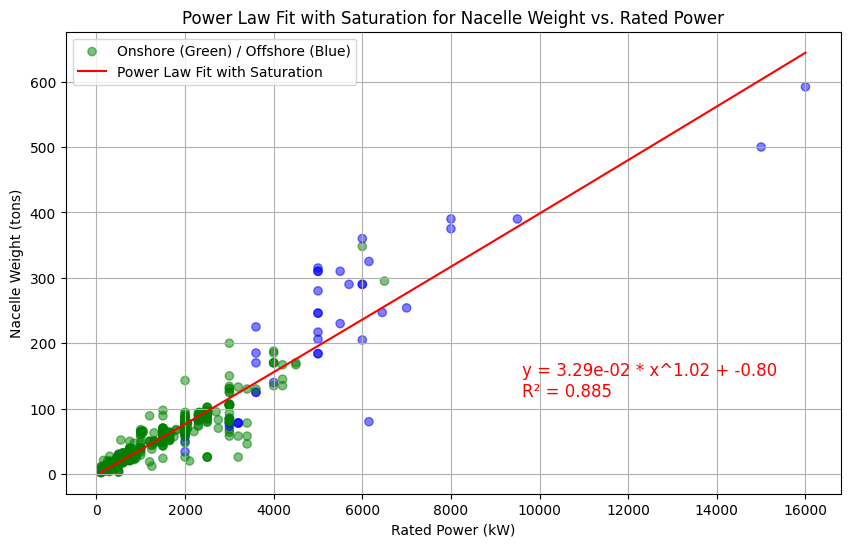

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

# Load the spreadsheet
file_path = "Turbines_20230629.xlsx"  # Adjust path if necessary
df = pd.read_excel(file_path, sheet_name="Turbines")

# Clean and extract necessary columns
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
df["rated_power"] = pd.to_numeric(df["rated_power"], errors="coerce")
df["nacelle_weight"] = pd.to_numeric(df["nacelle_weight"], errors="coerce")

# Remove nacelle weights above 700 tons
df_nacelle_filtered = df[df["nacelle_weight"] <= 700].dropna(subset=["rated_power", "nacelle_weight"])

# Extract x (Rated Power) and y (Nacelle Weight)
x_nacelle_filtered = df_nacelle_filtered["rated_power"].values
y_nacelle_filtered = df_nacelle_filtered["nacelle_weight"].values

# Define a power-law function with saturation to enforce non-decreasing trend
def power_law_with_saturation(x, a, b, c):
    return a * (x ** b) + c

# Fit the power-law model
popt_power_law, _ = curve_fit(power_law_with_saturation, x_nacelle_filtered, y_nacelle_filtered, maxfev=10000)

# Generate predictions for plotting
x_fit_nacelle_filtered = np.linspace(min(x_nacelle_filtered), max(x_nacelle_filtered), 100)
y_power_law_fit = power_law_with_saturation(x_fit_nacelle_filtered, *popt_power_law)

# Compute R² value
r2_power_law = r2_score(y_nacelle_filtered, power_law_with_saturation(x_nacelle_filtered, *popt_power_law))

# Get equation as a string
equation_power_law = f"{popt_power_law[0]:.2e} * x^{popt_power_law[1]:.2f} + {popt_power_law[2]:.2f}"

# Define colors for offshore and onshore points
df_nacelle_filtered["offshore"] = df_nacelle_filtered["offshore"].astype(str).str.lower() == "yes"
colors_nacelle_filtered = np.where(df_nacelle_filtered["offshore"], "blue", "green")

# Plot scatter with power-law fit
plt.figure(figsize=(10, 6))
plt.scatter(x_nacelle_filtered, y_nacelle_filtered, c=colors_nacelle_filtered, label="Onshore (Green) / Offshore (Blue)", alpha=0.5)
plt.plot(x_fit_nacelle_filtered, y_power_law_fit, label="Power Law Fit with Saturation", color="red")

# Add equation and R² value
text_x_power_law = max(x_nacelle_filtered) * 0.6
text_y_power_law = max(y_nacelle_filtered) * 0.2
plt.text(text_x_power_law, text_y_power_law, f"y = {equation_power_law}\nR² = {r2_power_law:.3f}", fontsize=12, color="red")

plt.xlabel("Rated Power (kW)")
plt.ylabel("Nacelle Weight (tons)")
plt.legend()
plt.title("Power Law Fit with Saturation for Nacelle Weight vs. Rated Power")
plt.grid()
plt.show()

/var/folders/_s/t2tb7ghj5k77zblhgrk26qk80000gn/T/ipykernel_9637/1238636439.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tower_filtered["offshore"] = df_tower_filtered["offshore"].astype(str).str.lower() == "yes"


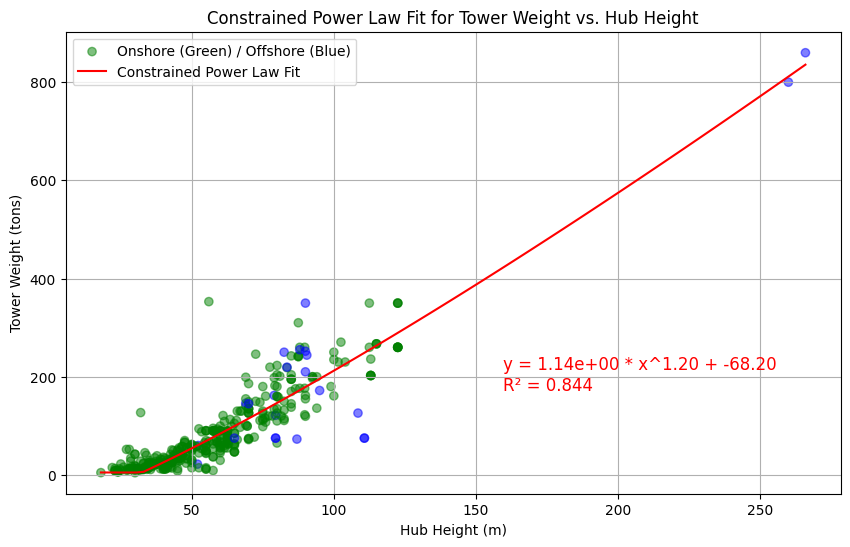

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score
import re

# Load the spreadsheet
file_path = "Turbines_20230629.xlsx"  # Adjust path if necessary
df = pd.read_excel(file_path, sheet_name="Turbines")

# Clean and extract necessary columns
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
df["minimum_hub_height"] = pd.to_numeric(df["minimum_hub_height"], errors="coerce")
df["maximum_hub_height"] = pd.to_numeric(df["maximum_hub_height"], errors="coerce")
df["hub_height"] = df[["minimum_hub_height", "maximum_hub_height"]].mean(axis=1)

# Function to extract numerical values from tower weight and compute average
def extract_avg_weight(value):
    if isinstance(value, str):
        numbers = re.findall(r"\d+\.?\d*", value)  # Extract numbers from string
        if len(numbers) == 2:
            return (float(numbers[0]) + float(numbers[1])) / 2  # Compute average of interval
        elif len(numbers) == 1:
            return float(numbers[0])  # Single value case
    return pd.to_numeric(value, errors="coerce")  # Convert if already numeric

# Apply extraction function to Tower Weight
df["tower_weight"] = df["tower_weight"].apply(extract_avg_weight)

# Drop rows with missing values
df_tower = df.dropna(subset=["hub_height", "tower_weight"])

# Apply filtering: Ignore tower weights above 400 tons for hub heights below 150 meters
df_tower_filtered = df_tower[~((df_tower["hub_height"] < 150) & (df_tower["tower_weight"] > 400))]

# Extract x (Hub Height) and y (Tower Weight)
x_tower_filtered = df_tower_filtered["hub_height"].values
y_tower_filtered = df_tower_filtered["tower_weight"].values

# Define a constrained power-law function that remains positive
def constrained_power_law(x, a, b, c):
    return np.maximum(a * (x ** b) + c, 5)  # Ensures the fit remains non-negative

# Fit the constrained power-law model
popt_constrained_tower, _ = curve_fit(constrained_power_law, x_tower_filtered, y_tower_filtered, maxfev=10000)

# Generate predictions for plotting
x_fit_tower_filtered = np.linspace(min(x_tower_filtered), max(x_tower_filtered), 100)
y_constrained_tower_fit = constrained_power_law(x_fit_tower_filtered, *popt_constrained_tower)

# Compute R² value
r2_constrained_tower = r2_score(y_tower_filtered, constrained_power_law(x_tower_filtered, *popt_constrained_tower))

# Get equation as a string
equation_constrained_tower = f"{popt_constrained_tower[0]:.2e} * x^{popt_constrained_tower[1]:.2f} + {popt_constrained_tower[2]:.2f}"

# Define colors for offshore and onshore points
df_tower_filtered["offshore"] = df_tower_filtered["offshore"].astype(str).str.lower() == "yes"
colors_tower_filtered = np.where(df_tower_filtered["offshore"], "blue", "green")

# Plot scatter with constrained power-law fit
plt.figure(figsize=(10, 6))
plt.scatter(x_tower_filtered, y_tower_filtered, c=colors_tower_filtered, label="Onshore (Green) / Offshore (Blue)", alpha=0.5)
plt.plot(x_fit_tower_filtered, y_constrained_tower_fit, label="Constrained Power Law Fit", color="red")

# Add equation and R² value
text_x_constrained_tower = max(x_tower_filtered) * 0.6
text_y_constrained_tower = max(y_tower_filtered) * 0.2
plt.text(text_x_constrained_tower, text_y_constrained_tower, f"y = {equation_constrained_tower}\nR² = {r2_constrained_tower:.3f}", fontsize=12, color="red")

plt.xlabel("Hub Height (m)")
plt.ylabel("Tower Weight (tons)")
plt.legend()
plt.title("Constrained Power Law Fit for Tower Weight vs. Hub Height")
plt.grid()
plt.show()

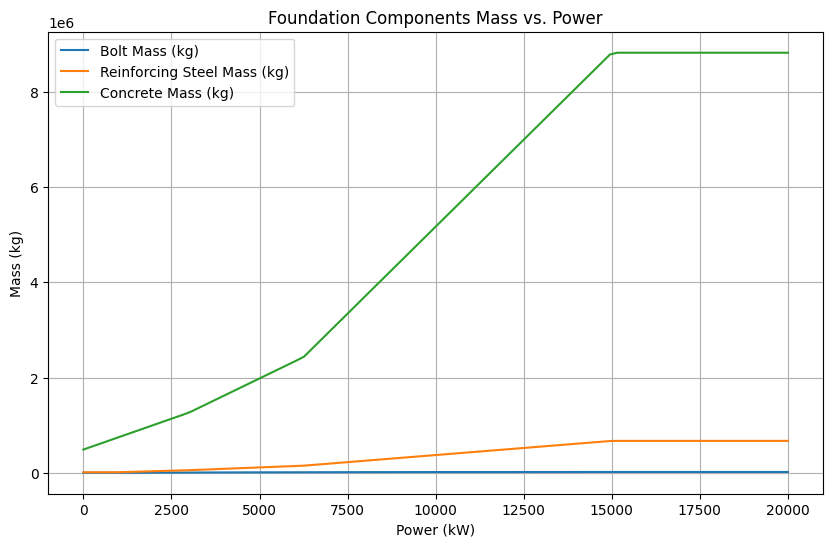

In [8]:
# relations based on data from: https://www.researchgate.net/publication/360964240_Recent_and_future_trends_of_onshore_wind_turbine_foundations

def get_ultimate_limit_state(power):
    """
    Calculates the Ultimate Limit State (ULS) moment for the wind turbine foundation.

    The function estimates the ULS moment by computing the forces acting on the wind turbine
    due to wind loading and gravitational forces. The wind force is based on the drag coefficient,
    air density, and rotor swept area, while the gravitational force is based on the nacelle and rotor mass.


    ULS values for 0, 3 and 6.25 MW are from: https://research.chalmers.se/publication/530584/file/530584_Fulltext.pdf
    ULS value for 15 MW is from: https://www.mdpi.com/1996-1073/17/9/2189

    :return: The ultimate limit state (ULS) moment in MN·m (Meganewton-meters).
    :rtype: float
    """
    power_x = [0, 3000, 6250, 15000]
    uls = [0, 100, 250, 1073]

    # linear interpolator
    M_ULS_MN = np.interp(power, power_x, uls)

    return M_ULS_MN

def get_foundation_mass(power):
    uls = get_ultimate_limit_state(power)
    # Calculate masses based on ULS, using a reciprocal relation
    bolt_mass = (-2984.78 / (uls + 112.21)) + 19.02  # in tons
    bolt_mass *= 1000  # Convert to kg
    # minimum 1000 kg of bolts
    bolt_mass = np.clip(bolt_mass, 1000, None)

    reinf_mass = (0.63267732 * uls) - 9.30963858  # in tons
    reinf_mass *= 1000  # Convert to kg
    # minimum 10000 kg of reinforcing steel
    reinf_mass = np.clip(reinf_mass, 10000, None)

    # Calculate concrete volume and mass
    concrete_vol = (
        3.23575233 * uls
    ) + 203.0179  # in cubic meters
    # minimum 50 m3 of concrete
    concrete_vol = np.clip(concrete_vol, 50, None)

    concrete_mass = concrete_vol * 2400  # in kg
    return bolt_mass, reinf_mass, concrete_mass

# plot power vs. foundation mass
powers = np.linspace(0, 20000, 100)
bolt_masses = []
reinf_masses = []
concrete_masses = []
for power in powers:
    bolt_mass, reinf_mass, concrete_mass = get_foundation_mass(power)
    bolt_masses.append(bolt_mass)
    reinf_masses.append(reinf_mass)
    concrete_masses.append(concrete_mass)

plt.figure(figsize=(10, 6))
plt.plot(powers, bolt_masses, label="Bolt Mass (kg)")
plt.plot(powers, reinf_masses, label="Reinforcing Steel Mass (kg)")
plt.plot(powers, concrete_masses, label="Concrete Mass (kg)")
plt.xlabel("Power (kW)")
plt.ylabel("Mass (kg)")
plt.title("Foundation Components Mass vs. Power")
plt.legend()
plt.grid()
plt.show()

In [10]:
bolt_masses

[1000.0,
 1000.0,
 1000.0,
 1000.0,
 1000.0,
 1000.0,
 1000.0,
 1000.0,
 1048.2810188546168,
 1748.5728564088952,
 2396.3359478621946,
 2997.266898225924,
 3556.2673408415703,
 4077.577937096098,
 4564.886155824972,
 5046.873541340723,
 5631.290334217255,
 6168.78396404427,
 6664.787548670569,
 7123.926593271952,
 7550.163674423307,
 7946.913095849299,
 8317.132543657292,
 8663.39694992053,
 8987.958467570297,
 9292.79551078263,
 9579.653118087994,
 9850.076378157277,
 10105.438270586861,
 10346.9629808947,
 10575.74552541515,
 10806.461769162472,
 11214.593236524948,
 11584.084556333124,
 11920.175133031664,
 12227.198085374392,
 12508.768079707239,
 12767.924307071402,
 13007.240623128599,
 13228.911325101202,
 13434.81862946036,
 13626.58624850537,
 13805.622295995741,
 13973.153921748008,
 14130.255477460998,
 14277.871580766147,
 14416.836124028838,
 14547.888036070372,
 14671.684426006967,
 14788.811602816872,
 14899.794360668548,
 15005.103840291162,
 15105.164214805314,
 15200.